In [1]:
import numpy as np
import matplotlib.pyplot as plt
import RestrictedBoltzmannMachine as RBM
import wandb

In [ ]:
data = None
with open("train-images.idx3-ubyte", "rb") as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data = (data > 128).astype(np.uint8)

validation_data = None
with open("t10k-images.idx3-ubyte", "rb") as f:
    validation_data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

validation_data = (validation_data > 128).astype(np.uint8)

In [ ]:
wandb.init(
    project="restricted-boltzmann-machine",

    config={
        "learning_rate": 0.01,
        "architecture": "RBM",
        "dataset": "MNIST",
        "epochs": 10,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lucasericsson (lucasericsson222). Use `wandb login --relogin` to force relogin


In [ ]:
my_rbm = RBM.RestrictedBoltzmannMachine(28*28, 28*28)

In [ ]:
my_rbm.contrastive_divergence(data, validation_data)

(60000, 784)
Epoch: 0
current_weight_diff: 9.689390941701044
sqrd_recon_error: 0.2685076530612245
Epoch: 1
current_weight_diff: 2.4418165988103877
sqrd_recon_error: 0.23539540816326532
Epoch: 2
current_weight_diff: 2.1425123302736746
sqrd_recon_error: 0.21917091836734695
Epoch: 3
current_weight_diff: 3.2516453948503625
sqrd_recon_error: 0.18315051020408163
Epoch: 4
current_weight_diff: 0.9372883452954854
sqrd_recon_error: 0.15818877551020408
Epoch: 5
current_weight_diff: 0.9470025124972214
sqrd_recon_error: 0.1497704081632653
Epoch: 6
current_weight_diff: 0.7700241925552531
sqrd_recon_error: 0.1689030612244898
Epoch: 7
current_weight_diff: 0.6215630786031258
sqrd_recon_error: 0.16900510204081634
Epoch: 8
current_weight_diff: 0.6580907050586503
sqrd_recon_error: 0.1789158163265306
Epoch: 9
current_weight_diff: 0.48371829101152436
sqrd_recon_error: 0.14204081632653062


In [ ]:
wandb.finish()

wandb: ERROR Problem finishing run
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 2313, in _atexit_cleanup
    self._on_finish()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 2567, in _on_finish
    self._footer_file_pusher_status_info(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 3749, in _footer_file_pusher_status_info
    Run._footer_single_run_file_pusher_status_info(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/wandb_run.py", line 3802, in _footer_single_run_file_pusher_status_info
    printer.progress_close()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/wandb/sdk/lib/printer.py", line 292, in progress_close
    self._progress.close()
  Fil

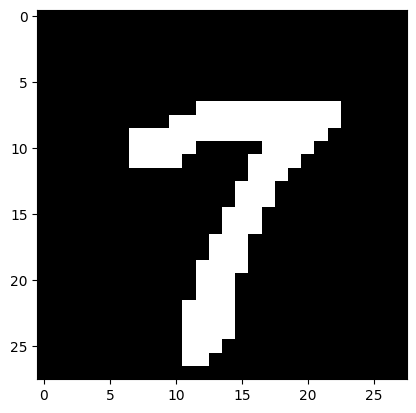

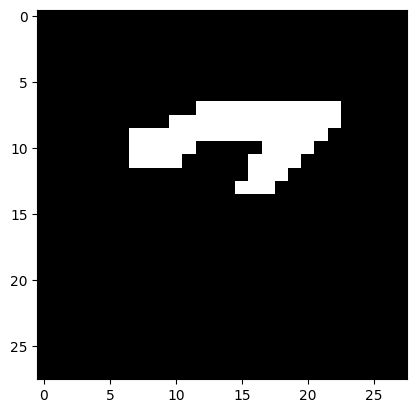

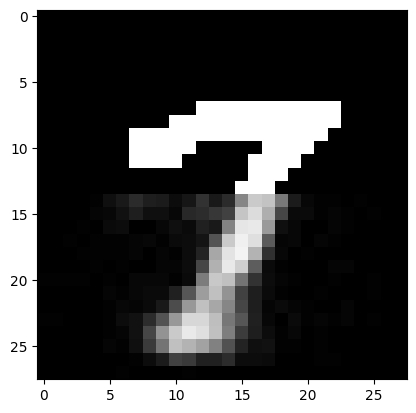

In [ ]:
data2 = None
with open("t10k-images.idx3-ubyte", "rb") as f:
    data2 = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)

data2 = (data2 > 128).astype(np.uint8)

myin = data[np.random.randint(0,60000)]
inimg = myin.reshape(28,28).copy()
plt.imshow(inimg, cmap='gray')
plt.show()
inimg[14:, :] = 0
plt.imshow(inimg, cmap='gray')
plt.show()

out = my_rbm.conditional_gibbs_sample(np.matrix(inimg.reshape(1, 28*28)).T, 1)
for i in range(0, 100):
    out += my_rbm.conditional_gibbs_sample(np.matrix(inimg.reshape(1, 28*28)).T, 100)

out = out.astype(np.uint8)
img = out.reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image